---
title: 'Lab 1'
author: "Hunter Blinkenberg"
format: 
    html:
        toc: true
        code-fold: true
        theme: vapor
        echo: true
---

###Exercises

In [2]:
import pandas as pd

In [6]:
q1_data = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Lab_1_data/q1data.csv")

print(q1_data.head())

    income  life_exp  population  year      country four_regions  \
0   1910.0      61.0  29200000.0  2010  Afghanistan         asia   
1  11100.0      78.1   2950000.0  2010      Albania       europe   
2  11100.0      74.7  36000000.0  2010      Algeria       africa   
3  46900.0      81.9     84500.0  2010      Andorra       europe   
4   7680.0      60.8  23400000.0  2010       Angola       africa   

                six_regions       eight_regions           world_bank_region  
0                south_asia           asia_west                  South Asia  
1       europe_central_asia         europe_east       Europe & Central Asia  
2  middle_east_north_africa        africa_north  Middle East & North Africa  
3       europe_central_asia         europe_west       Europe & Central Asia  
4        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa  


In [7]:
q2_data = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Lab_1_data/q2data.csv")

In [8]:
q3_data = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Lab_1_data/q3data.csv")

###Task 1

1. The aesthetics are a bubble plot, with points, size, color, and labels corresponding to the variables. 
the aesthetics are mapped as such:
  x = "income",
  y = "life_exp",
  color = "four_regions",
  size = "population",
  label = "country"

In [36]:
import plotnine as plt
from plotnine import *

In [ ]:
year = 2010
q1_data_filtered = q1_data[q1_data["year"] == year]
print(q1_data_filtered)

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


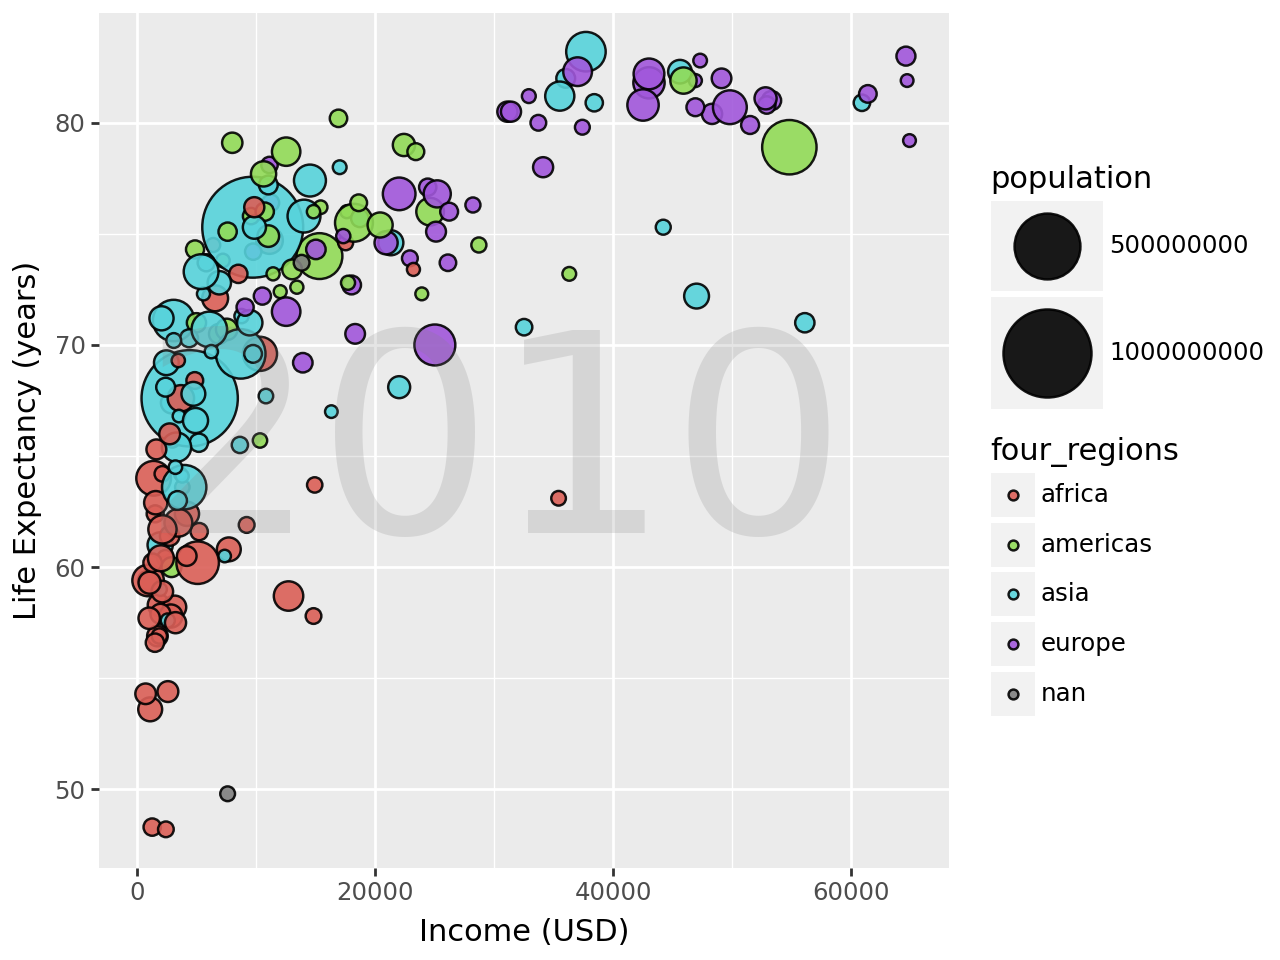

In [51]:
(ggplot(q1_data_filtered,
aes(
  x = ("income"),
  y = "life_exp",
  fill = "four_regions",
  size = "population",
  label = "country"
))
+ geom_point(alpha = 0.9)
#+ geom_text(ha='left', va='bottom')
+ labs(x="Income (USD)", y="Life Expectancy (years)")
+ xlim(0,65000)
+ scale_size(range=(2,20))
#+ scale_x_log10()
+ annotate('text', x=30000, y=65, label=str(year), size=100, alpha=0.2, color='gray')
)

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


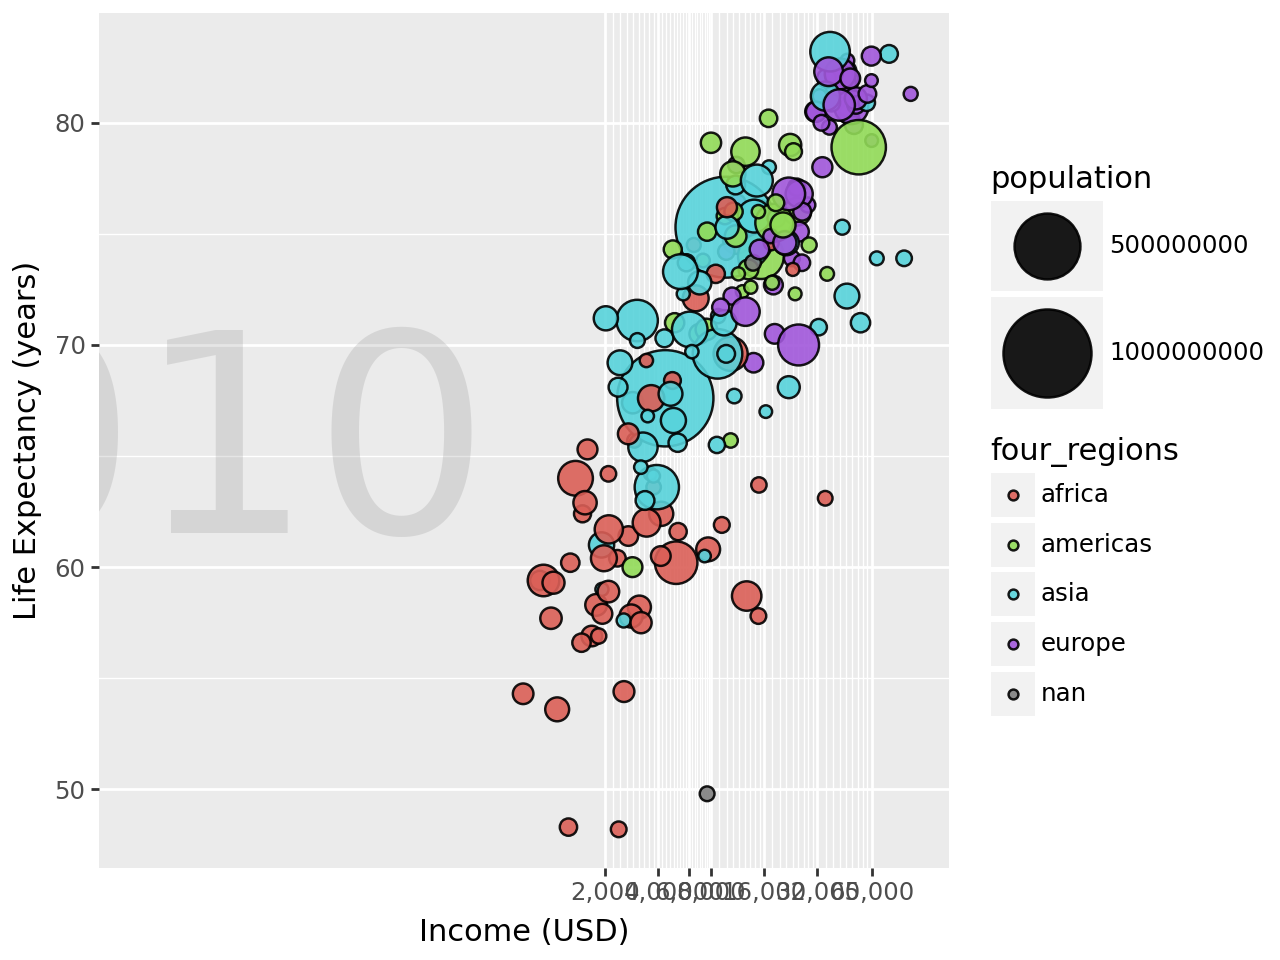

In [54]:
import numpy as np
# Shift income slightly to avoid zero values in log scale (add a small constant)
q1_data_filtered['income_shifted'] = q1_data_filtered['income'] + 1

# Custom breaks for the x-axis after log-like transformation
x_breaks = [2000, 4000, 6000, 8000, 16000, 32000, 65000]

# Create the plot
(ggplot(q1_data_filtered,
       aes(
           x="income_shifted",  # Use the shifted income column
           y="life_exp",
           fill="four_regions",
           size="population",
           label="country"
       ))
 + geom_point(alpha=0.9)
 # + geom_text(ha='left', va='bottom')
 + labs(x="Income (USD)", y="Life Expectancy (years)")
 + scale_size(range=(2, 20))
 # Use scale_x_continuous for manual control over breaks and labels
 + scale_x_continuous(trans='log10', breaks=x_breaks, labels=[f"{b:,}" for b in x_breaks])
 + annotate('text', x=np.log10(30000 + 1), y=65, label=str(year), size=100, alpha=0.2, color='gray')
)